# Test

Test environment and ability to import modules. Also test how to import, read, and work with ST data in python.

### Import modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple, Union, List

from IPython.display import display

In [2]:
from inspect import getsourcefile
import glob
import os
import os.path as osp
import argparse as arp
import sys
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scanpy as sc
import anndata as ad

### Specify paths

In [4]:
DIR = '/'.join(osp.realpath(getsourcefile(lambda: 0)).split('/')[:-2])
DIR_DATA = DIR + '/data/her2st'
print('', DIR, '\n', DIR_DATA)

 /Users/lovisa.franzen/Documents/Courses/ml_medbioinfo_2020/ml_project 
 /Users/lovisa.franzen/Documents/Courses/ml_medbioinfo_2020/ml_project/data/her2st


### Read data for one sample

In [5]:
path_data = DIR_DATA + '/ST-cnts'
path_spot = DIR_DATA + '/ST-spotfiles'
path_anno = DIR_DATA + '/ST-pat' + '/labels'
path_img = DIR_DATA + '/ST-imgs'

In [6]:
sample_id = 'A1'

In [7]:
for path in [path_data, path_spot, path_anno, path_img]:
    #print (pth)
    print(glob.glob(path + '/*' + sample_id + '*'))

['/Users/lovisa.franzen/Documents/Courses/ml_medbioinfo_2020/ml_project/data/her2st/ST-cnts/A1.tsv.gz']
['/Users/lovisa.franzen/Documents/Courses/ml_medbioinfo_2020/ml_project/data/her2st/ST-spotfiles/A1_selection.tsv']
['/Users/lovisa.franzen/Documents/Courses/ml_medbioinfo_2020/ml_project/data/her2st/ST-pat/labels/A1_labeled_coordinates.tsv']
['/Users/lovisa.franzen/Documents/Courses/ml_medbioinfo_2020/ml_project/data/her2st/ST-imgs/A1']


***

**Count matrix**

In [8]:
data_df = pd.read_csv(glob.glob(path_data + '/*' + sample_id + '*')[0],
                      sep='\t',
                      header=0,
                      index_col=0)

In [9]:
print(data_df.shape)
data_df.iloc[0:5, 0:10]

(346, 15045)


,FO538757.1,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223
10x13,0,6,1,0,0,0,2,0,0,0
10x14,0,6,3,1,0,0,3,0,1,0
10x15,1,1,0,0,0,0,6,1,2,0
10x16,0,6,1,0,0,0,3,0,0,0
10x17,0,1,2,0,0,0,4,0,1,0


***

**Spot file**

In [10]:
spots_df = pd.read_csv(glob.glob(path_spot + '/*' + sample_id + '*')[0],
                       sep='\t',
                       index_col=None)

In [11]:
print(spots_df.shape)
spots_df.iloc[0:5, ]

(348, 7)


,x,y,new_x,new_y,pixel_x,pixel_y,selected
0,22,12,21.939,11.948,4550.31,2394.07,1
1,21,12,20.918,11.969,4328.43,2398.66,1
2,16,12,15.999,11.995,3259.47,2404.35,1
3,20,12,20.128,11.977,4156.75,2400.41,1
4,26,12,26.018,11.992,5436.72,2403.69,1


***

**Annotation file**

In [12]:
anno_df = pd.read_csv(glob.glob(path_anno + '/*' + sample_id + '*')[0],
                       sep='\t',
                       index_col=None)

In [13]:
print(anno_df.shape)
anno_df.iloc[0:5, ]

(348, 6)


,Row.names,x,y,pixel_x,pixel_y,label
0,1002x1762,9.020,20.994,1002.500,1761.872412,invasive cancer
1,1002x2642,9.018,13.999,1002.250,2641.802265,invasive cancer
2,1003x1001,9.026,27.045,1003.250,1000.692206,adipose tissue
3,1004x1628,9.031,22.060,1003.875,1627.775882,invasive cancer
4,1006x1514,9.050,22.964,1006.250,1514.058000,invasive cancer


In [14]:
anno_df['xy_pixel'] = anno_df['Row.names']
anno_df['xy'] = np.round(
    anno_df['x']).astype(int).astype(str) + 'x' + np.round(
        anno_df['y']).astype(int).astype(str)
anno_df

,Row.names,x,y,pixel_x,pixel_y,label,xy_pixel,xy
0,1002x1762,9.020,20.994,1002.500,1761.872412,invasive cancer,1002x1762,9x21
1,1002x2642,9.018,13.999,1002.250,2641.802265,invasive cancer,1002x2642,9x14
2,1003x1001,9.026,27.045,1003.250,1000.692206,adipose tissue,1003x1001,9x27
3,1004x1628,9.031,22.060,1003.875,1627.775882,invasive cancer,1004x1628,9x22
4,1006x1514,9.050,22.964,1006.250,1514.058000,invasive cancer,1006x1514,9x23
...,...,...,...,...,...,...,...,...
343,868x2514,7.940,15.014,867.500,2514.121235,invasive cancer,868x2514,8x15
344,869x2645,7.952,13.977,869.000,2644.569735,invasive cancer,869x2645,8x14
345,871x1510,7.971,22.999,871.375,1509.655206,invasive cancer,871x1510,8x23
346,997x1999,8.977,19.108,997.125,1999.120118,invasive cancer,997x1999,9x19


In [15]:
anno_df['label'].unique()

array(['invasive cancer', 'adipose tissue', 'undetermined',
       'connective tissue', 'cancer in situ', 'immune infiltrate'],
      dtype=object)

***

**Image** --- skip for now (may not be needed at all)

***

## Process data

In the annotation data, row names are provided as pixel coordinates (XxY) without decimals. The first step is to attach the annotation data to the expression data matrices. By having these two files aligned, we do not even need the spot files since all neccessary information has already been prepared in the annotation files.
The spot file is however needed to identify the conversion bewteen annotation data and expression matrix.

In [16]:
spots_df['xy'] = spots_df['x'].astype(str) + 'x' + spots_df['y'].astype(str)
spots_df

,x,y,new_x,new_y,pixel_x,pixel_y,selected,xy
0,22,12,21.939,11.948,4550.31,2394.07,1,22x12
1,21,12,20.918,11.969,4328.43,2398.66,1,21x12
2,16,12,15.999,11.995,3259.47,2404.35,1,16x12
3,20,12,20.128,11.977,4156.75,2400.41,1,20x12
4,26,12,26.018,11.992,5436.72,2403.69,1,26x12
...,...,...,...,...,...,...,...,...
343,6,28,5.878,27.954,1060.05,5894.21,1,6x28
344,14,28,14.065,27.984,2839.19,5900.77,1,14x28
345,5,28,4.973,27.976,863.38,5899.02,1,5x28
346,13,28,13.105,27.998,2630.57,5903.83,1,13x28


Merge spot df with spot annotations

In [17]:
metadata_df = pd.merge(spots_df, anno_df[['label', 'xy', 'xy_pixel']], on='xy', how='inner')
metadata_df.index = metadata_df['xy']

print(metadata_df.shape)
metadata_df

(348, 10)


,x,y,new_x,new_y,pixel_x,pixel_y,selected,xy,label,xy_pixel
xy,,,,,,,,,,
22x12,22,12,21.939,11.948,4550.31,2394.07,1,22x12,invasive cancer,2617x2900
21x12,21,12,20.918,11.969,4328.43,2398.66,1,21x12,invasive cancer,2490x2897
16x12,16,12,15.999,11.995,3259.47,2404.35,1,16x12,invasive cancer,1875x2894
20x12,20,12,20.128,11.977,4156.75,2400.41,1,20x12,invasive cancer,2391x2896
26x12,26,12,26.018,11.992,5436.72,2403.69,1,26x12,invasive cancer,3127x2894
...,...,...,...,...,...,...,...,...,...,...
6x28,6,28,5.878,27.954,1060.05,5894.21,1,6x28,adipose tissue,610x886
14x28,14,28,14.065,27.984,2839.19,5900.77,1,14x28,invasive cancer,1633x883
5x28,5,28,4.973,27.976,863.38,5899.02,1,5x28,adipose tissue,497x884


In [155]:
# Add sample name to metadata
metadata_df['sample_id'] = sample_id

Create a new label column with cancer/non-cancer labels

In [18]:
metadata_df['label_cancer'] = 'healthy'

In [19]:
idx_cancer = metadata_df[metadata_df['label'].str.contains('cancer')].index
metadata_df.loc[idx_cancer, 'label_cancer'] = 'cancer'

In [156]:
metadata_df[metadata_df['label'].str.contains('adipose')]
metadata_df[metadata_df['label'].str.contains('cancer')]

,x,y,new_x,new_y,pixel_x,pixel_y,selected,xy,label,xy_pixel,label_cancer,sample_id
xy,,,,,,,,,,,,
22x12,22,12,21.939,11.948,4550.31,2394.07,1,22x12,invasive cancer,2617x2900,cancer,A1
21x12,21,12,20.918,11.969,4328.43,2398.66,1,21x12,invasive cancer,2490x2897,cancer,A1
16x12,16,12,15.999,11.995,3259.47,2404.35,1,16x12,invasive cancer,1875x2894,cancer,A1
20x12,20,12,20.128,11.977,4156.75,2400.41,1,20x12,invasive cancer,2391x2896,cancer,A1
26x12,26,12,26.018,11.992,5436.72,2403.69,1,26x12,invasive cancer,3127x2894,cancer,A1
...,...,...,...,...,...,...,...,...,...,...,...,...
13x27,13,27,13.108,26.995,2631.22,5684.49,1,13x27,invasive cancer,1514x1007,cancer,A1
12x27,12,27,12.084,27.017,2408.69,5689.31,1,12x27,invasive cancer,1386x1004,cancer,A1
14x28,14,28,14.065,27.984,2839.19,5900.77,1,14x28,invasive cancer,1633x883,cancer,A1


**Plot x, y coordinates**

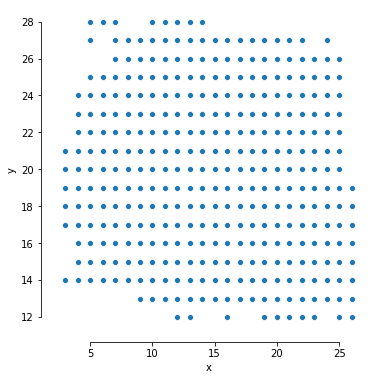

In [21]:
sns.pairplot(x_vars=["x"], y_vars=["y"], data=spots_df, size=5)
sns.despine(offset=10, trim=True);

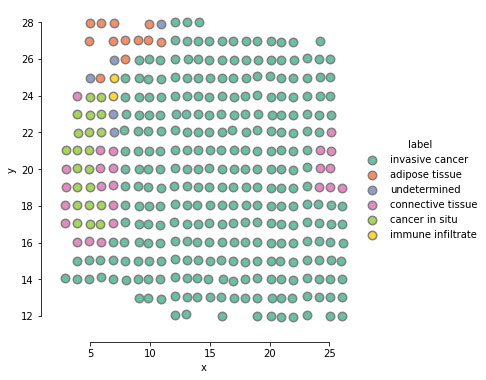

In [84]:
sns.set_palette("Set2")
sns.pairplot(x_vars=["x"], y_vars=["y"], data=anno_df, 
             hue="label", 
             size=5,
             plot_kws=dict(s=70, edgecolor="grey", linewidth=1.5, alpha=1)
            )
sns.despine(offset=10, trim=True); 

*Adjusted x and y coordinates*

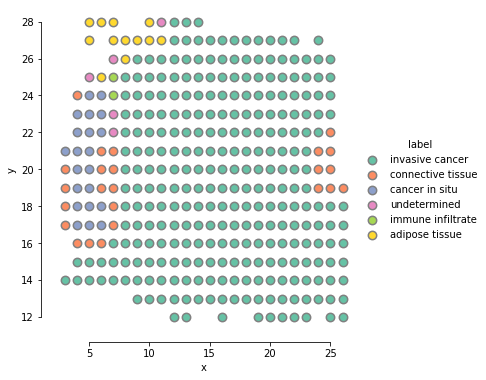

In [82]:
sns.set_palette("Set2")
sns.pairplot(x_vars=["x"], y_vars=["y"], data=metadata_df, 
             hue="label", 
             size=5,
             plot_kws=dict(s=70, edgecolor="grey", linewidth=1.5, alpha=1)
            )
sns.despine(offset=10, trim=True); 

*X and y coordinates with all labels*

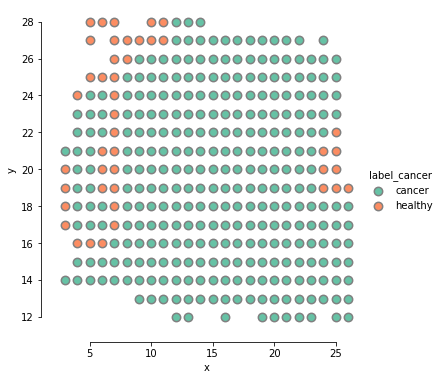

In [89]:
sns.set_palette("Set2")
sns.pairplot(x_vars=["x"], y_vars=["y"], data=metadata_df, 
             hue="label_cancer", 
             size=5,
             plot_kws=dict(s=70, edgecolor="grey", linewidth=1.5, alpha=1)
            )
sns.despine(offset=10, trim=True); 

*X and y coordinates with binarized labels*

Now our metadata object contains all the needed spot annotations and information needed to proceed. Next we need to subset our count data and metadata to include the same spot identifiers.

***

**Anndata**  
https://anndata.readthedocs.io/en/stable/anndata.AnnData.html  

Create anndata object for count data and metadata

In [25]:
print(data_df.shape)
print(metadata_df.shape)

(346, 15045)
(348, 11)


In [26]:
spots_counts = data_df.index.values
spots_meta = metadata_df['xy'].values
spots_shared = np.intersect1d(spots_meta, spots_counts)

spots_shared.shape

(346,)

In [27]:
data_df.loc[spots_shared, ]

,FO538757.1,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,RAB39B,CLIC2,TMLHE,SPRY3,VAMP7,ZFY,TBL1Y,UTY,KDM5D,EIF1AY
10x13,0,6,1,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10x14,0,6,3,1,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10x15,1,1,0,0,0,0,6,1,2,0,...,0,0,0,0,0,0,0,0,0,0
10x16,0,6,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10x17,0,1,2,0,0,0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x23,1,1,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9x24,0,1,5,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9x25,0,3,1,0,0,0,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9x26,0,2,2,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
st_adata = ad.AnnData(X=data_df.loc[spots_shared, ], obs=metadata_df.loc[spots_shared,])

In [29]:
st_adata

AnnData object with n_obs × n_vars = 346 × 15045
    obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'selected', 'xy', 'label', 'xy_pixel', 'label_cancer'

The data can now be accessed by calling `st_adata.X`, and their respective annotations by calling `st_adata.obs`

In [30]:
print(st_adata.X)
print(st_adata.obs)

[[0. 6. 1. ... 0. 0. 0.]
 [0. 6. 3. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 3. 1. ... 0. 0. 0.]
 [0. 2. 2. ... 0. 0. 0.]
 [0. 2. 1. ... 0. 0. 0.]]


,x,y,new_x,new_y,pixel_x,pixel_y,selected,xy,label,xy_pixel,label_cancer
xy,,,,,,,,,,,
10x13,10,13,9.852,12.991,1923.65,2622.15,1,10x13,invasive cancer,1106x2769,cancer
10x14,10,14,9.866,14.007,1926.69,2844.32,1,10x14,invasive cancer,1108x2641,cancer
10x15,10,15,9.876,14.992,1928.87,3059.72,1,10x15,invasive cancer,1110x2517,cancer
10x16,10,16,9.868,15.996,1927.13,3279.27,1,10x16,invasive cancer,1108x2391,cancer
10x17,10,17,9.841,16.999,1921.26,3498.60,1,10x17,invasive cancer,1105x2264,cancer
...,...,...,...,...,...,...,...,...,...,...,...
9x23,9,23,9.050,22.964,1749.37,4803.01,1,9x23,invasive cancer,1006x1514,cancer
9x24,9,24,9.070,23.934,1753.71,5015.13,1,9x24,invasive cancer,1009x1392,cancer
9x25,9,25,9.073,24.958,1754.36,5239.05,1,9x25,invasive cancer,1009x1263,cancer


**Test scanpy**  

Documentation: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [122]:
sc.logging.print_header()
#sc.pl.set_rcParams_defaults()
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map="viridis")

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.19.1 scipy==1.5.0 pandas==1.1.0 scikit-learn==0.23.1 statsmodels==0.12.0rc0


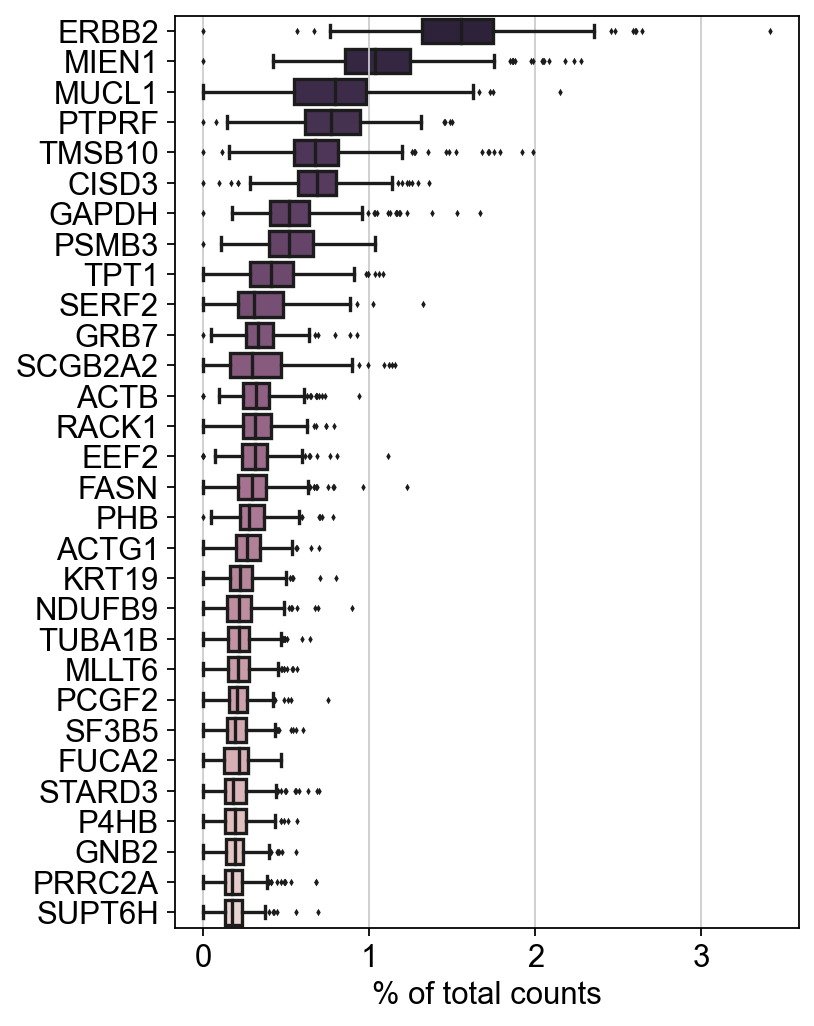

In [132]:
n = 30
sc.pl.highest_expr_genes(st_adata, n_top=n, palette=sns.cubehelix_palette(n, reverse=True))

In [117]:
st_adata.var['mt'] = st_adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(st_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

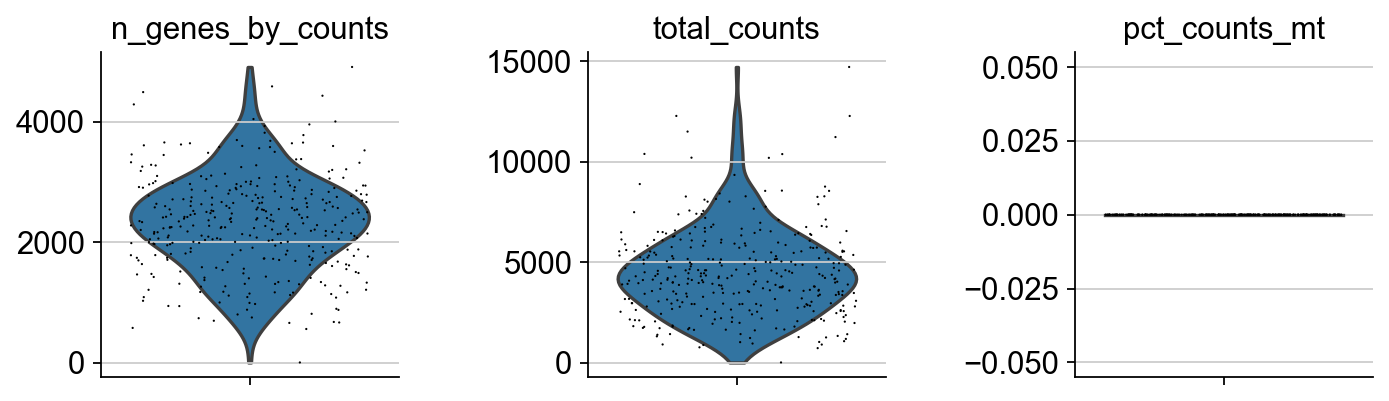

In [123]:
sc.pl.violin(st_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

It looks like the data has already been filtered. One spot seems to have 0 genes and counts though, so a simple filter to remove such spots will be needed.

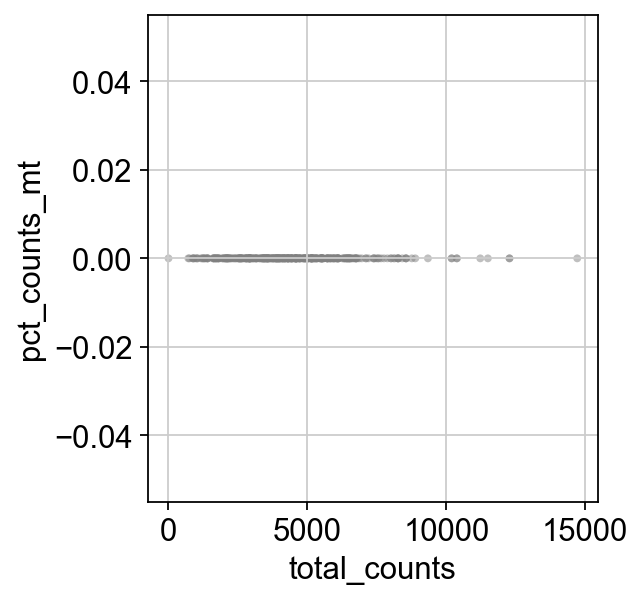

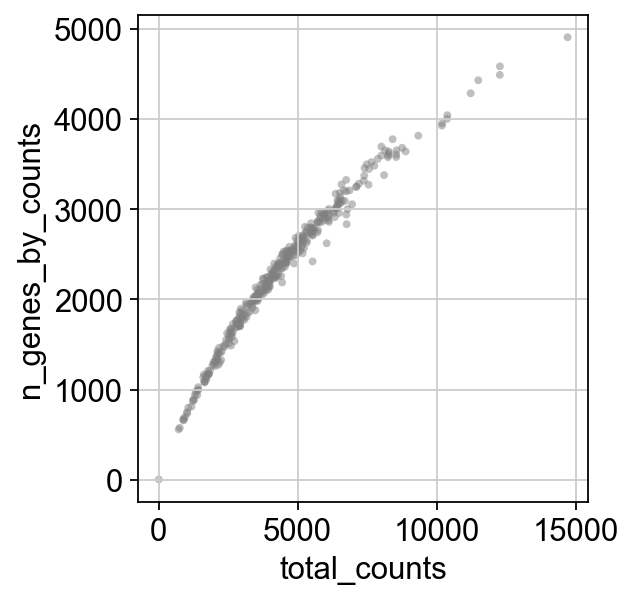

In [130]:
sc.pl.scatter(st_adata, x='total_counts', y='pct_counts_mt', size=50, alpha=0.5)
sc.pl.scatter(st_adata, x='total_counts', y='n_genes_by_counts', size=50, alpha=0.5)

**Test filter**

In [140]:
st_adata_filt = st_adata[st_adata.obs.n_genes_by_counts > 50, :]

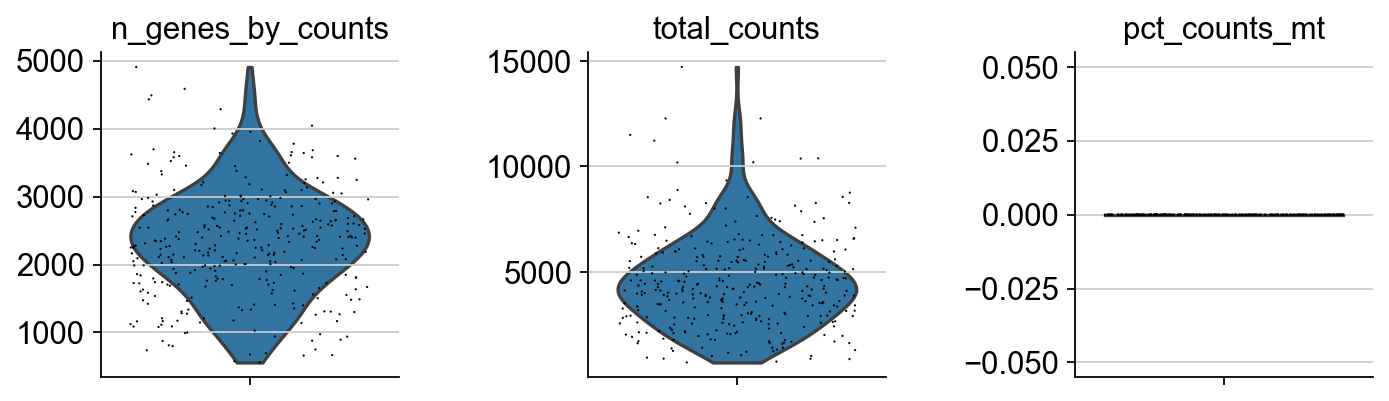

In [141]:
sc.pl.violin(st_adata_filt, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

**Test normalization**

Normalize by library size and then logarithmize.

In [150]:
sc.pp.normalize_total(st_adata_filt, target_sum=1e4)

In [151]:
sc.pp.log1p(st_adata_filt)

In [153]:
sc.pp.highly_variable_genes(st_adata_filt, min_mean=0.0125, max_mean=3, min_disp=0.5)

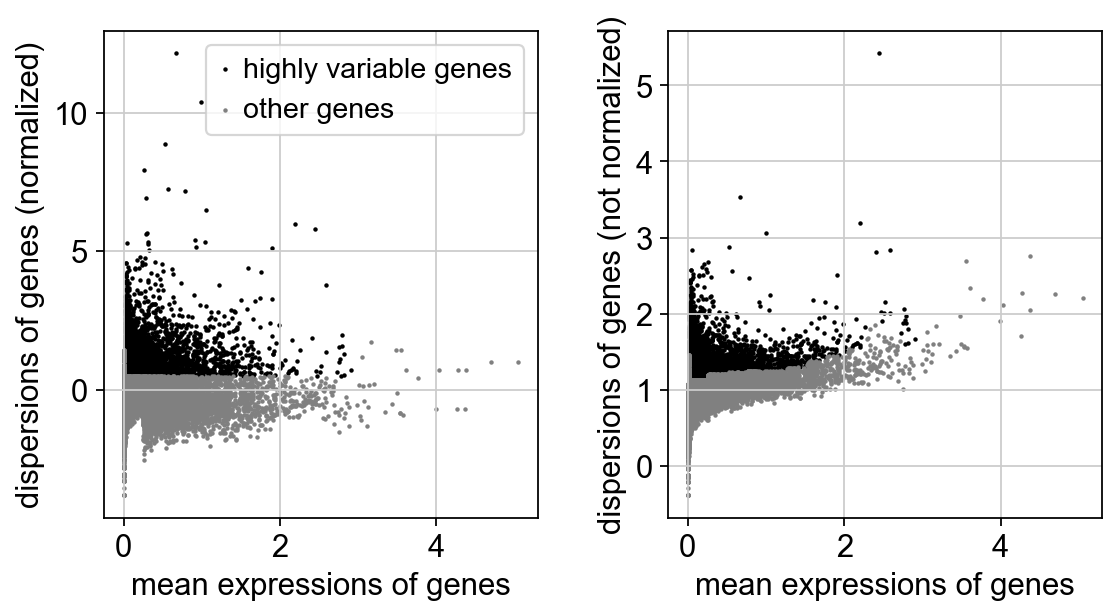

In [154]:
sc.pl.highly_variable_genes(st_adata_filt)

In [157]:
sc.pp.regress_out(st_adata_filt, ['total_counts'])

In [158]:
sc.pp.scale(st_adata_filt, max_value=10)

Run PCA and UMAP

In [204]:
sc.tl.pca(st_adata_filt, svd_solver='arpack')

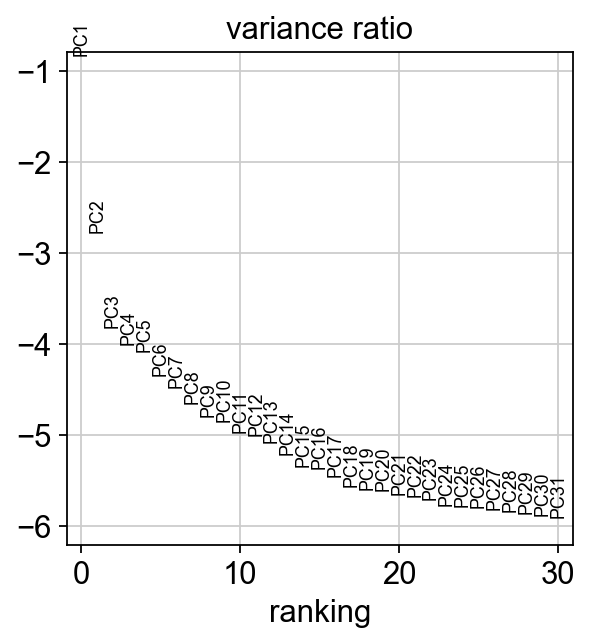

In [205]:
sc.pl.pca_variance_ratio(st_adata_filt, log=True)

In [206]:
st_adata_filt

AnnData object with n_obs × n_vars = 346 × 15045
    obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'selected', 'xy', 'label', 'xy_pixel', 'label_cancer', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [207]:
sc.pp.neighbors(st_adata_filt, n_neighbors=10, n_pcs=50)
sc.tl.umap(st_adata_filt)

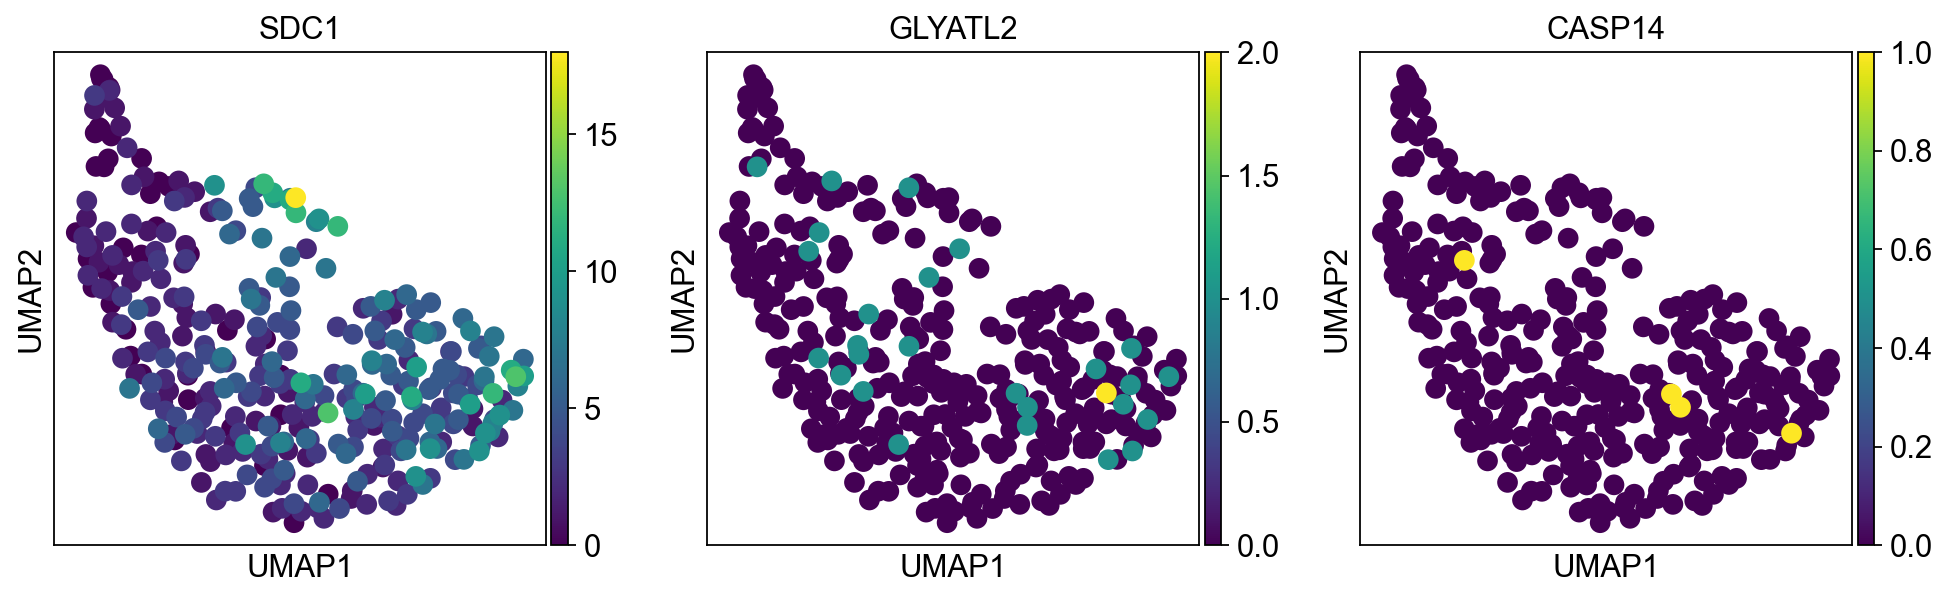

In [210]:
sc.pl.umap(st_adata_filt, color=['SDC1', 'GLYATL2', 'CASP14'], use_raw=False);

Cluster neighbourhood graph

In [211]:
sc.tl.leiden(st_adata_filt)

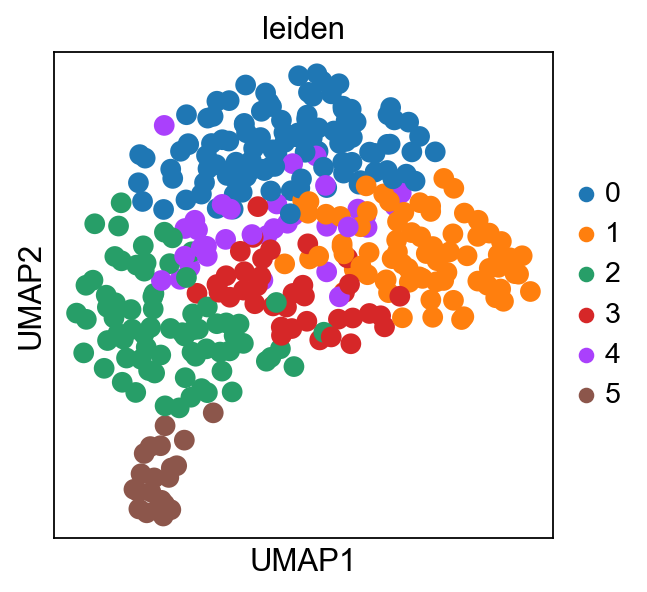

In [215]:
sc.pl.umap(st_adata_filt, color=['leiden'])

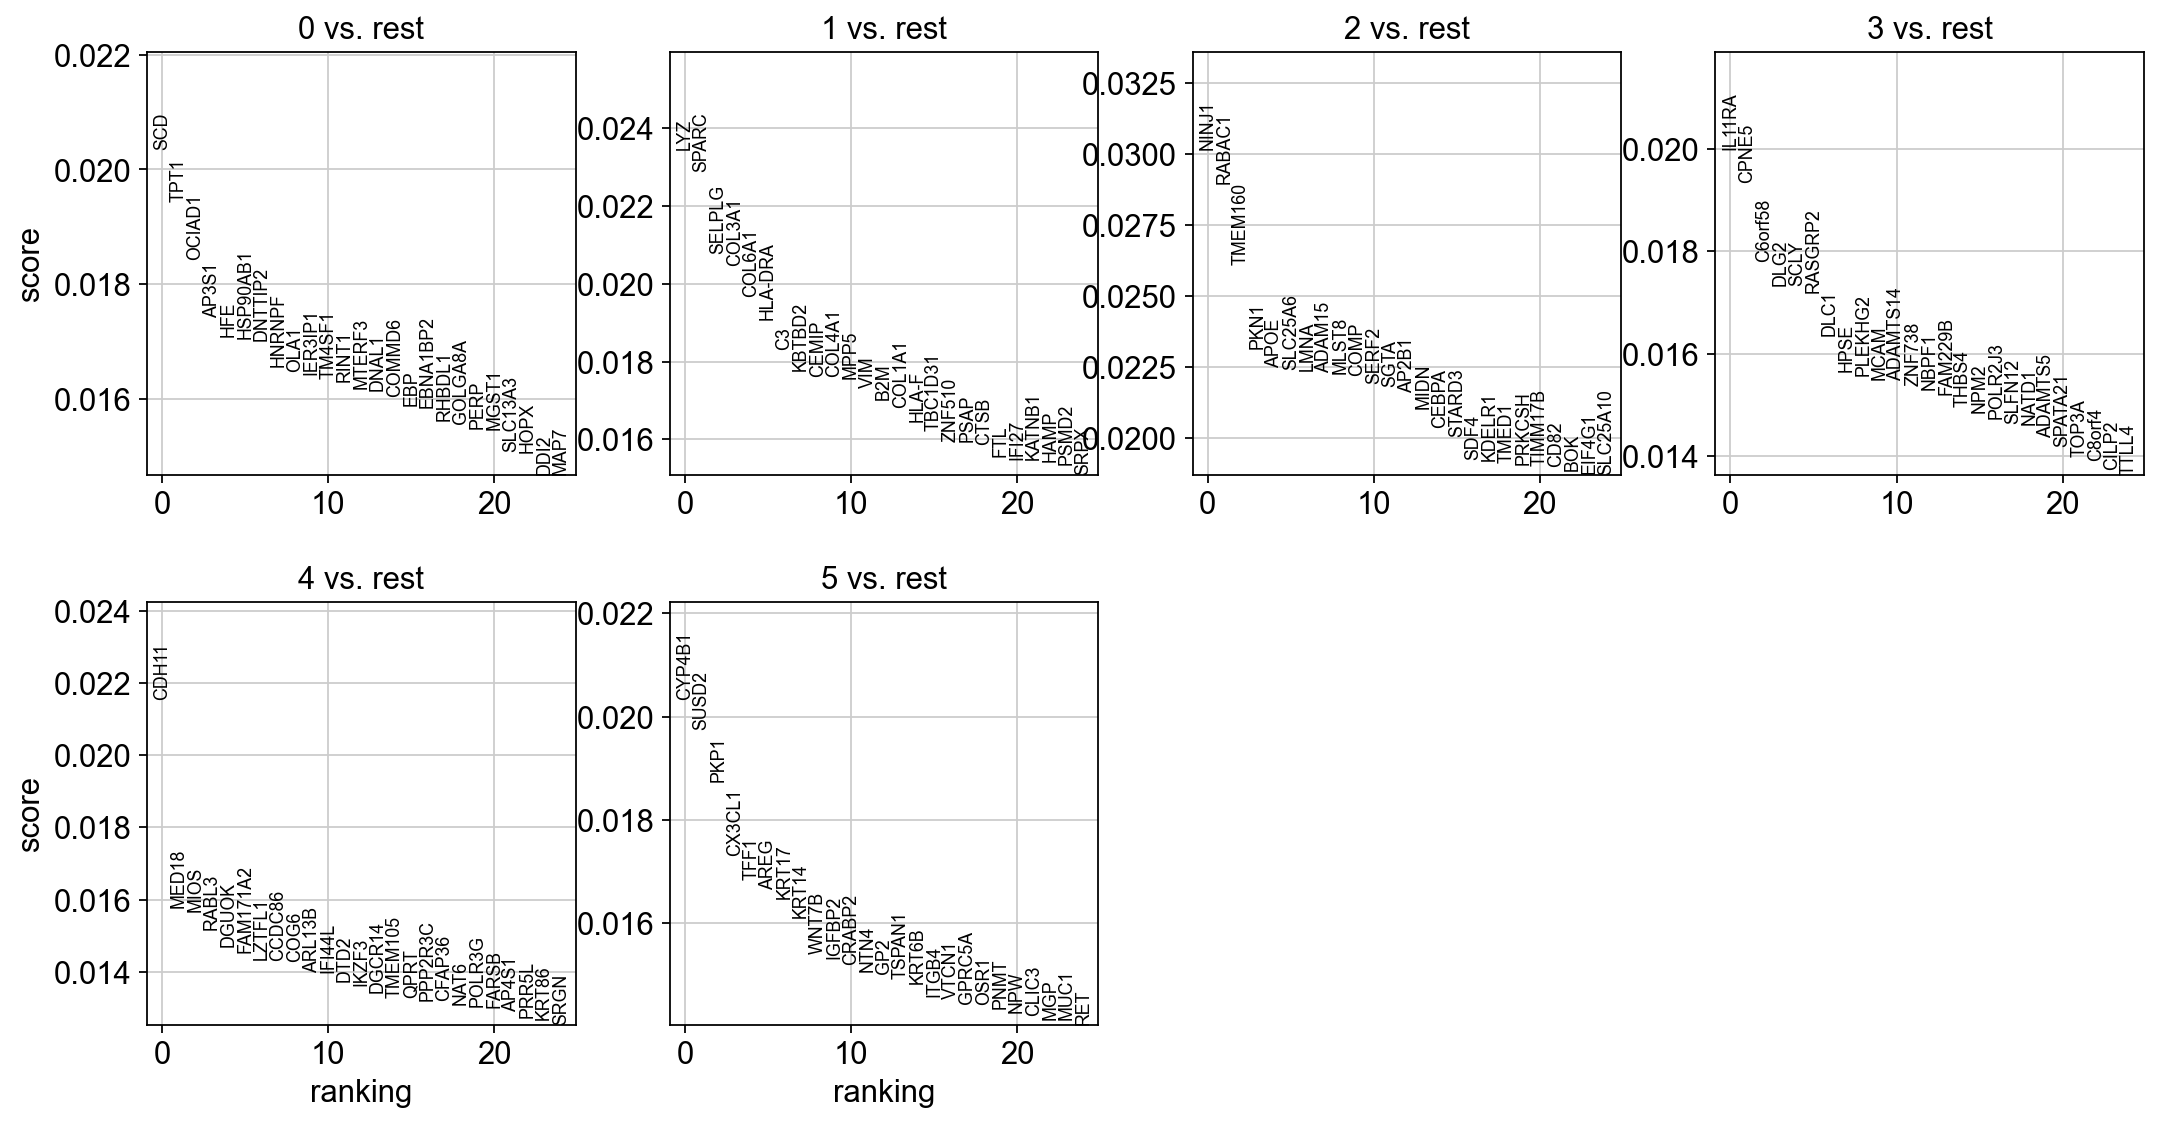

In [184]:
sc.tl.rank_genes_groups(st_adata_filt, 'leiden', method='logreg')
sc.pl.rank_genes_groups(st_adata_filt, n_genes=25, sharey=False)

['SCD', 'LYZ', 'NINJ1', 'IL11RA', 'CDH11', 'CYP4B1']


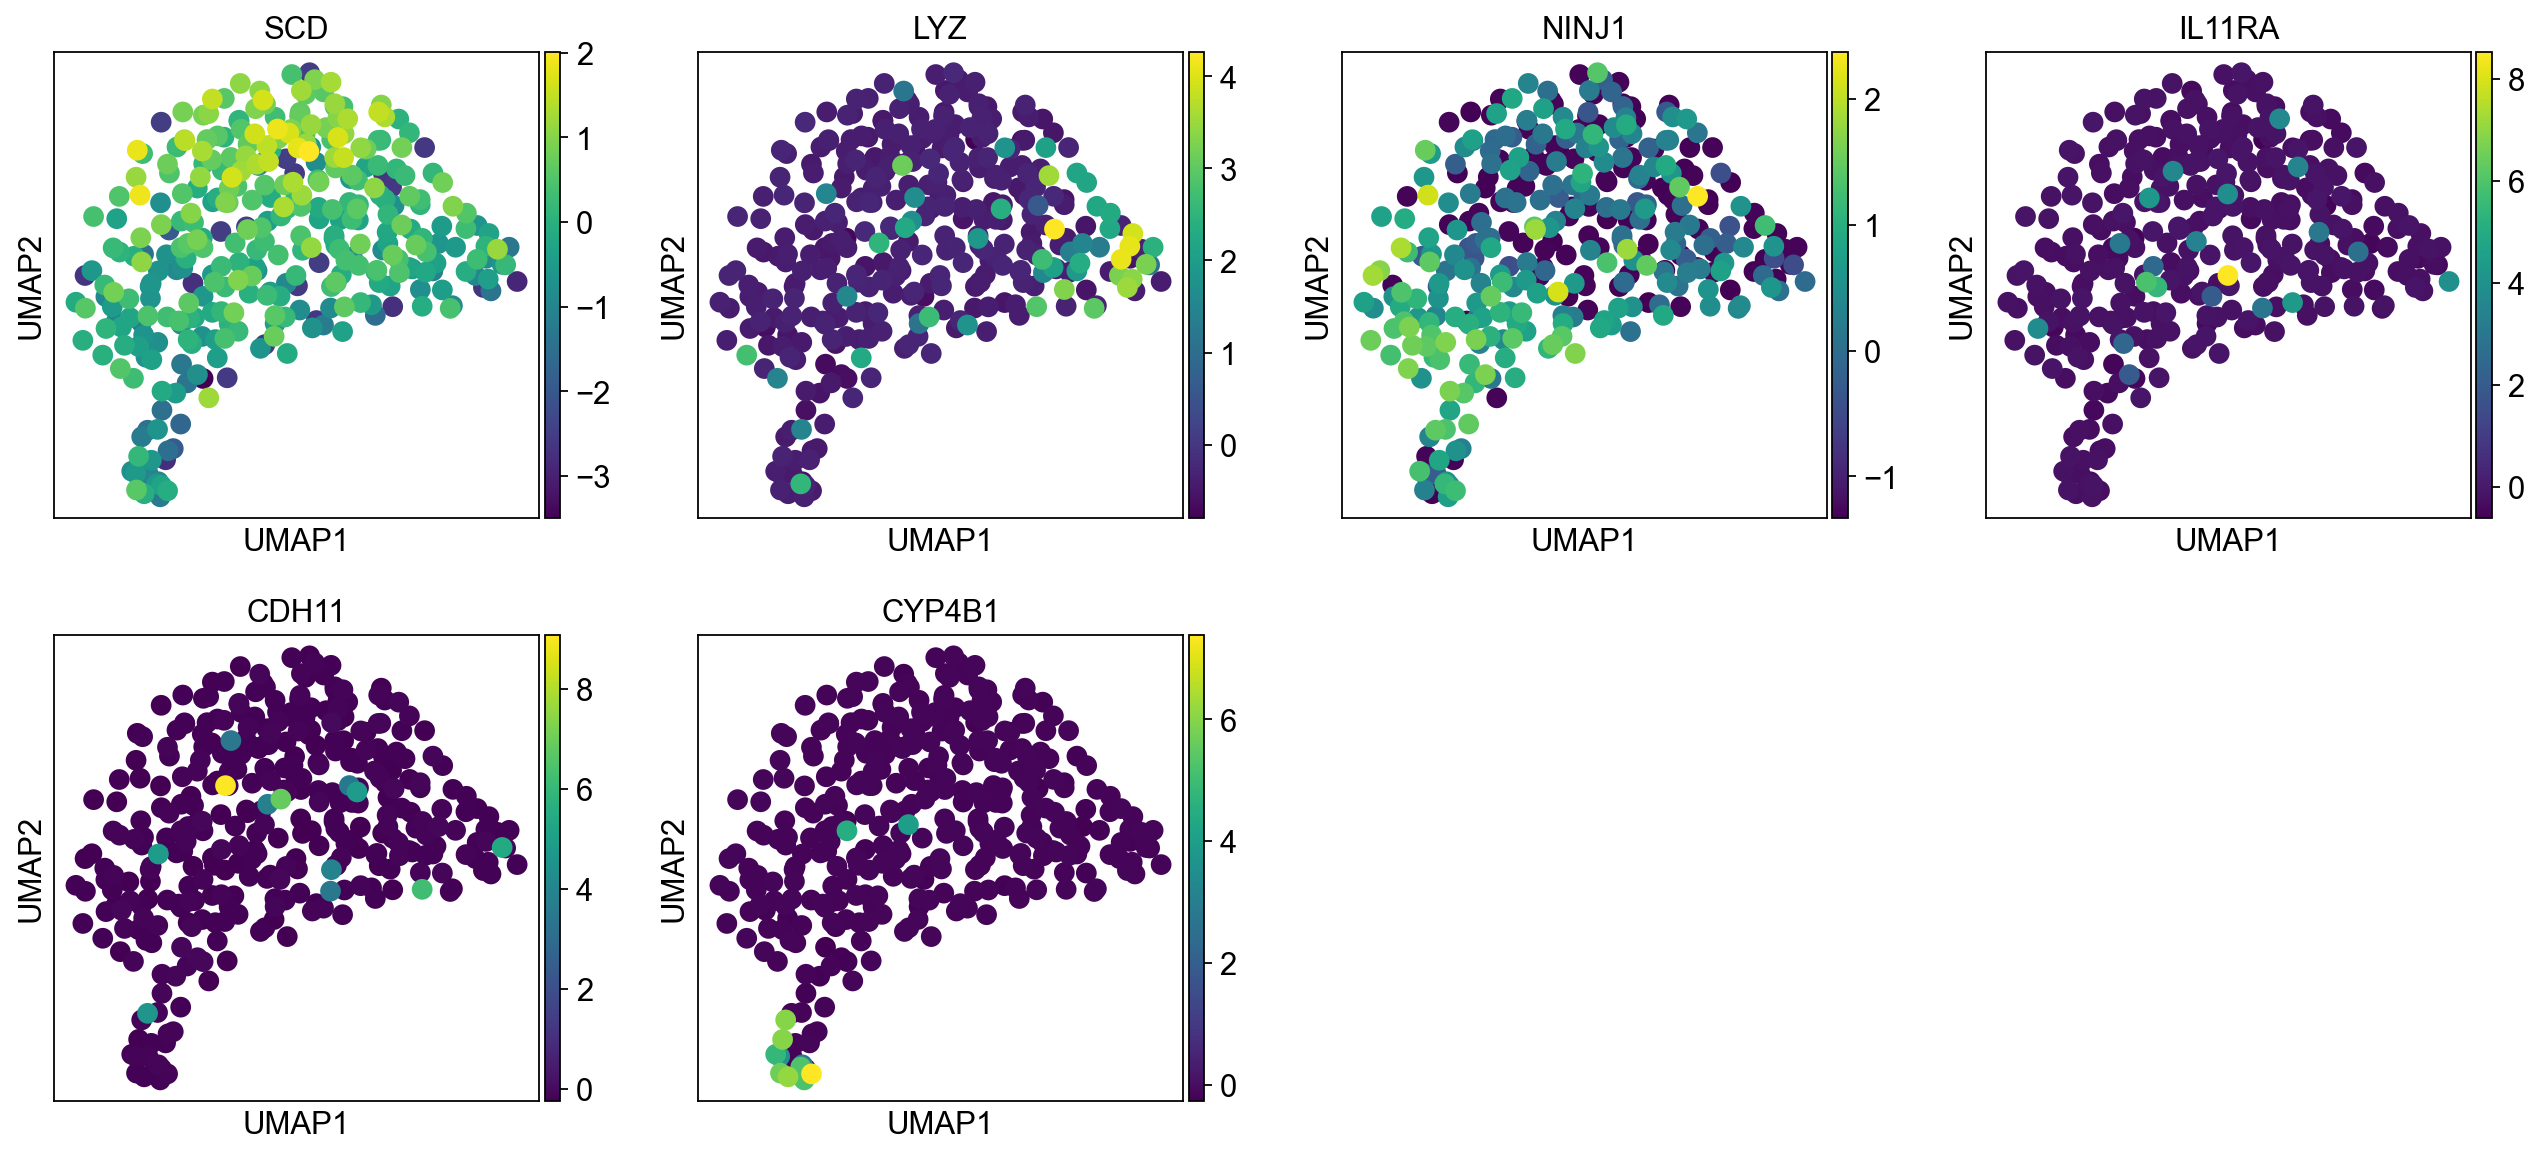

In [195]:
top_genes = pd.DataFrame(st_adata_filt.uns['rank_genes_groups']['names']).head(1).iloc[0,:].values.tolist()
print(top_genes)
sc.pl.umap(st_adata_filt, color=top_genes, use_raw=False);

Plot clusters spatially

In [213]:
df_plot = st_adata_filt.obs

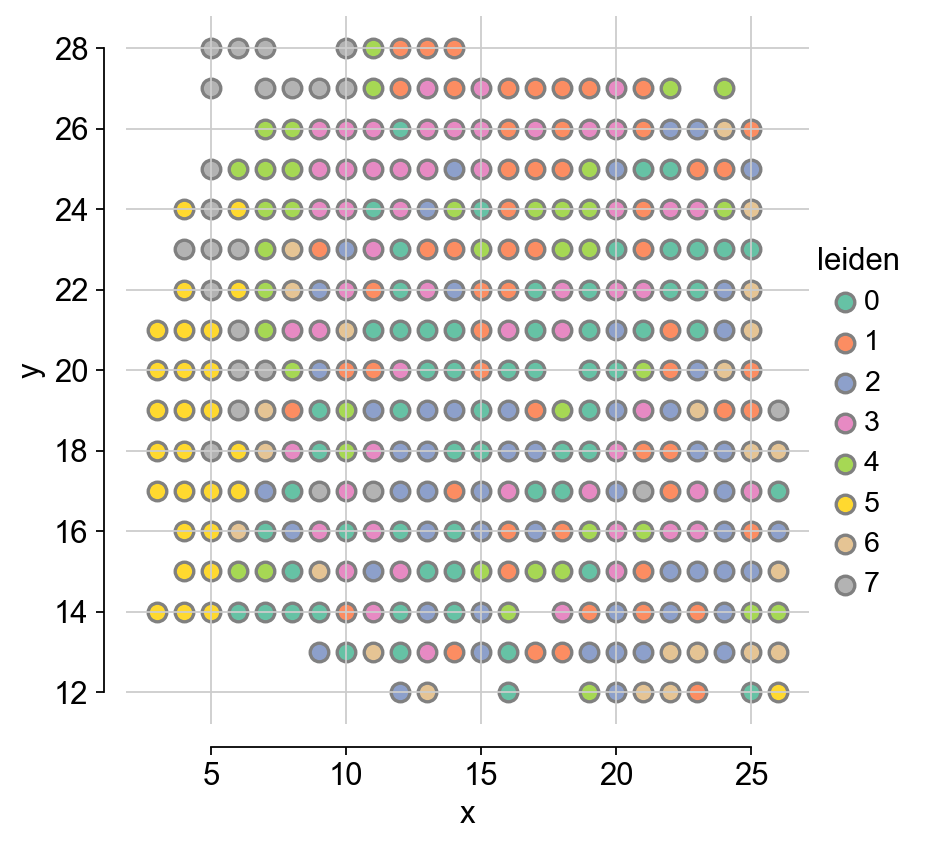

In [214]:
sns.set_palette("Set2")
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df_plot, 
             hue="leiden", 
             size=5,
             plot_kws=dict(s=70, edgecolor="grey", linewidth=1.5, alpha=1)
            )
sns.despine(offset=10, trim=True); 

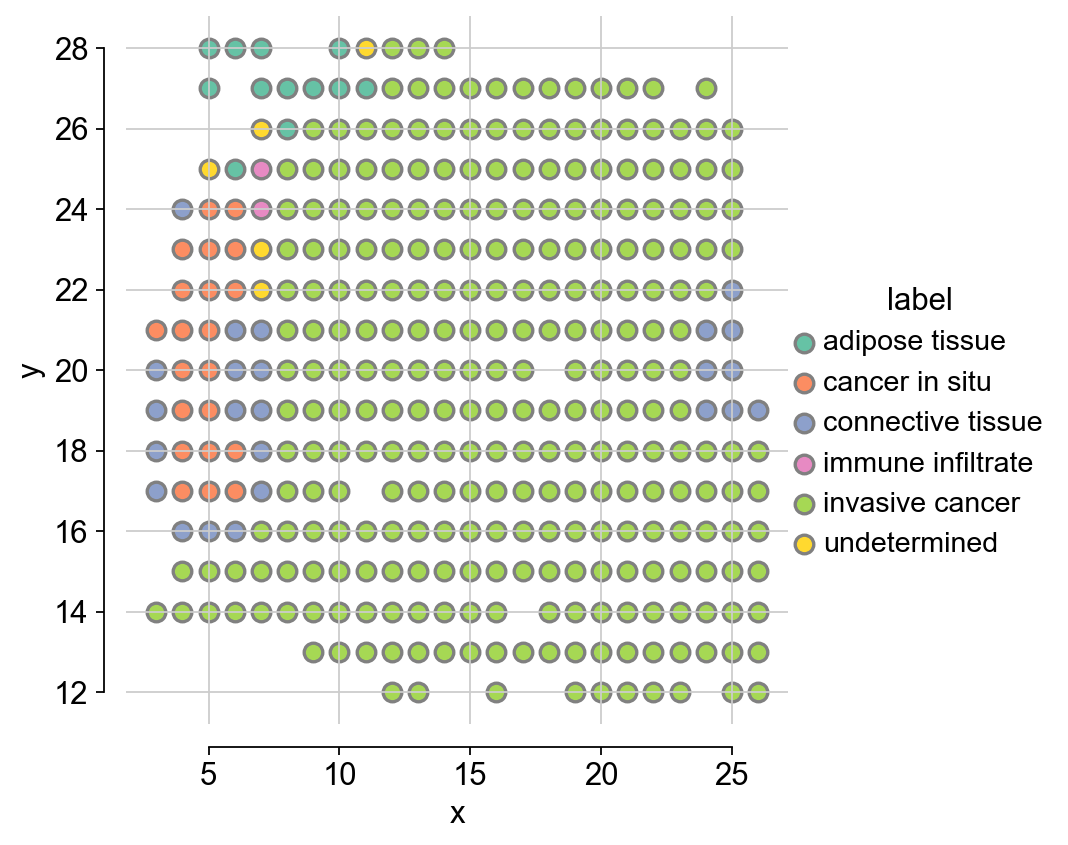

In [203]:
sns.set_palette("Set2")
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df_plot, 
             hue="label", 
             size=5,
             plot_kws=dict(s=70, edgecolor="grey", linewidth=1.5, alpha=1),
            )
sns.despine(offset=10, trim=True); 